In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("data/train.csv")
train.head(5)

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2011-07-14,30.979713,7.202545,54.759651,10.987410,NaN,36.020863,16.340000,20.749693,49.920250,...,17.142260,27.133936,55.470863,36.702957,NaN,33.548767,58.876469,41.520000,20.009031,NaN
1,2011-07-15,30.816076,7.013996,53.733215,11.206989,NaN,35.824635,16.389999,20.702850,49.813557,...,17.142260,27.093481,55.983479,36.806068,NaN,33.036930,58.710533,41.810001,20.183245,NaN
2,2011-07-18,29.755713,6.627473,53.084412,11.479702,NaN,35.150635,16.400000,20.507687,49.222694,...,16.949644,26.931633,55.747433,36.243568,NaN,32.644135,58.286407,42.060001,19.852234,NaN
3,2011-07-19,30.724440,6.608617,53.733215,11.573372,NaN,35.705189,17.100000,20.644304,50.552151,...,17.113718,27.263426,56.408432,36.965450,NaN,32.828632,58.553772,42.730000,19.721571,NaN
4,2011-07-20,30.711353,6.504916,53.297459,11.882014,NaN,35.619877,16.680000,20.453043,50.379814,...,17.292061,26.850712,56.185863,36.581070,NaN,32.340599,58.876469,42.090000,20.043877,NaN


In [4]:
col_nan = train.isnull().sum(axis=0)
row_nan = train.isnull().sum(axis=1)

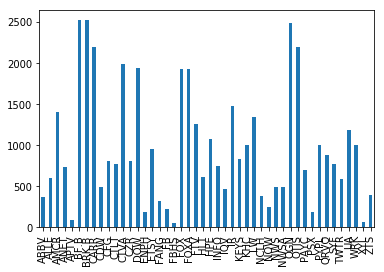

In [14]:
col_nan[col_nan > 3].plot.bar()
plt.show()

In [12]:
col_nan.mode()

0    3
dtype: int64

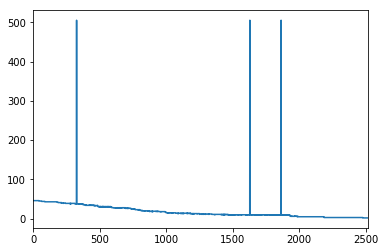

In [15]:
row_nan.plot.line()
plt.show()

In [19]:
t = list(row_nan[row_nan > 50].index)
train.loc[[327, 1629, 1864]]['Date']

327     2012-10-29
1629    2018-01-01
1864    2018-12-05
Name: Date, dtype: object

In [20]:
train.drop(t, inplace=True)

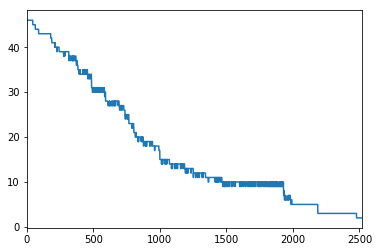

In [21]:
row_nan = train.isnull().sum(axis=1)
row_nan.plot.line()
plt.show()

In [ ]:
symbols = train.columns[1:]
for s in symbols:
    temp = train[["Date", s]]
    trade_dates = temp[temp[s].notna()]["Date"]
    last_trade = trade_dates.iloc[-1]